# DSC 540-Week 3 & 4 Exercises
# Kannur, Gyan



# Data Wrangling with Python: Activity 3.01


In [1]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## reading boston data
#column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = read_csv('./datasets/Boston_housing.csv')


In [3]:
## Check the first 10 records
boston_data.head(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:

## total number of records
boston_data.shape


(506, 14)

In [5]:
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [6]:
## Create a smaller DataFrame with columns that do not include CHAS, NOX, B, and LSTAT.
subset_data = boston_data.drop(["CHAS", "NOX", "B", "LSTAT"], axis=1)


In [7]:
## Check the last seven records of the new DataFrame you just created
subset_data.tail(7)



,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


Data Observation:
two data coulmns show interesting summeries. 
1. ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) with 0 for 25th, 50th percentiles. 
2. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles. These summeries are understandable as both variables are conditional + categorical variables.



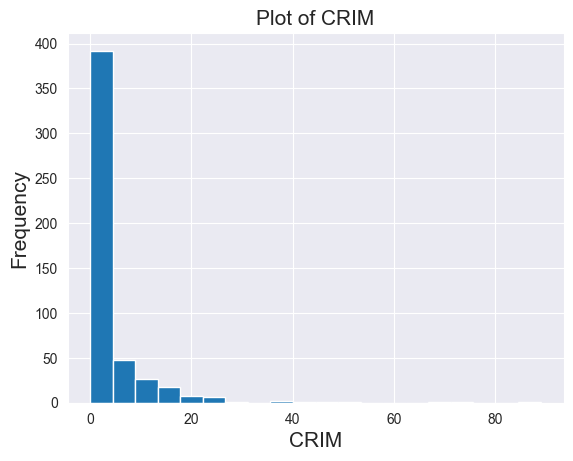

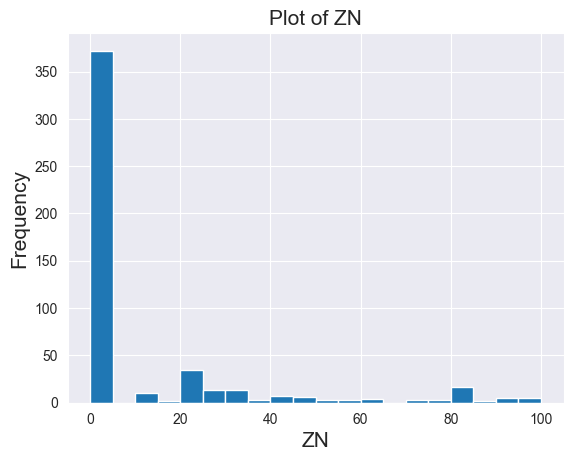

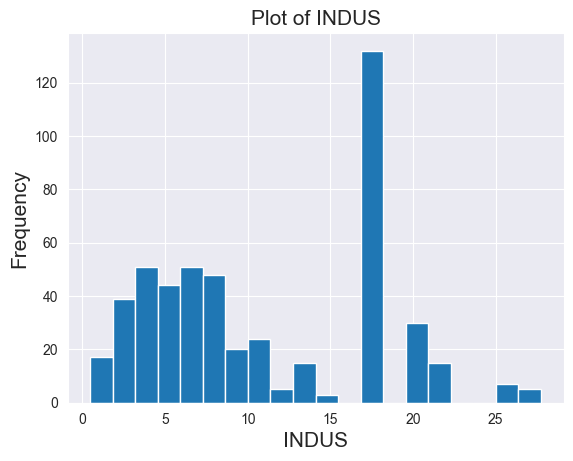

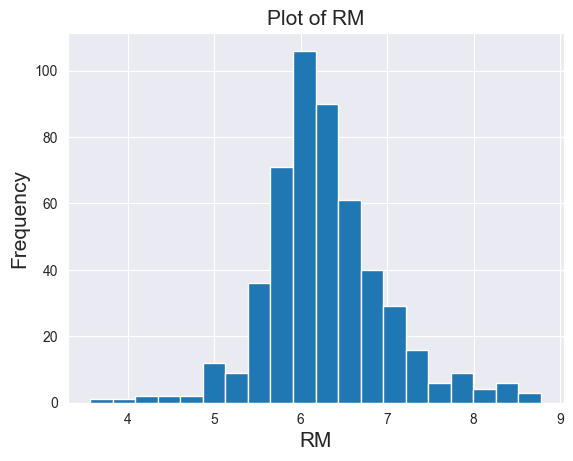

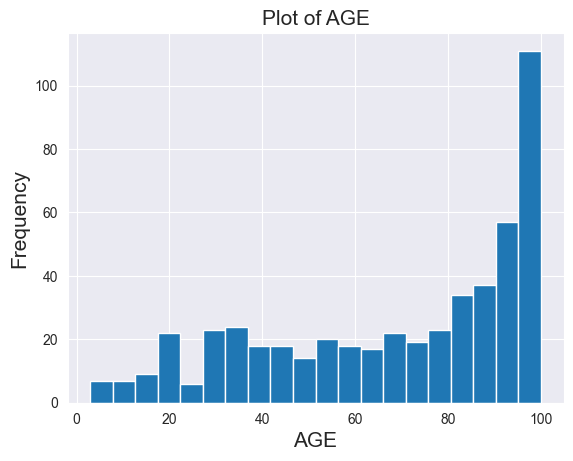

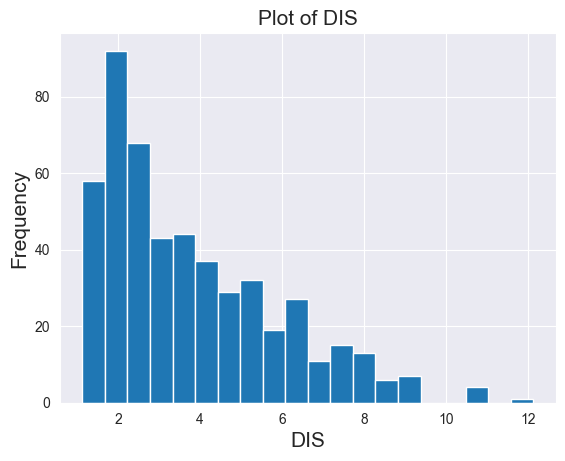

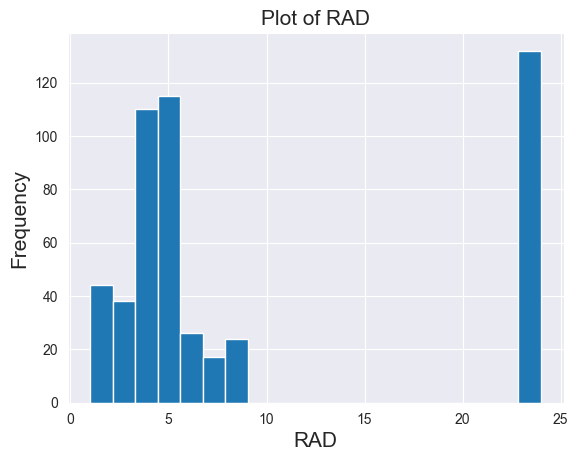

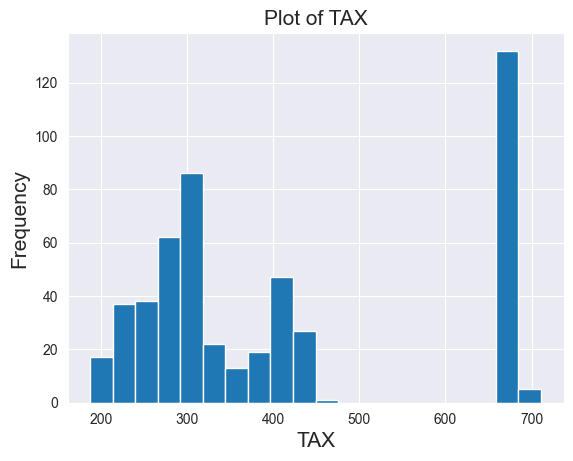

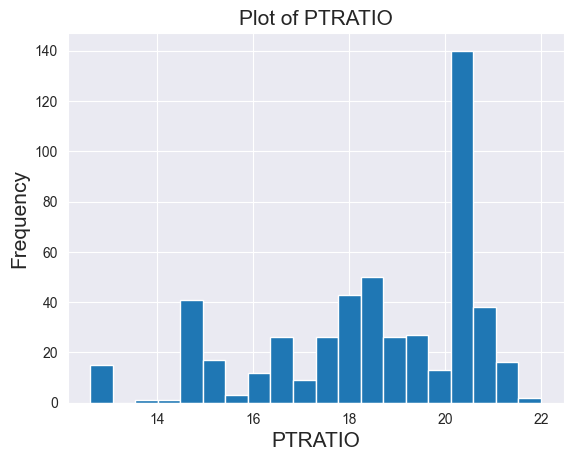

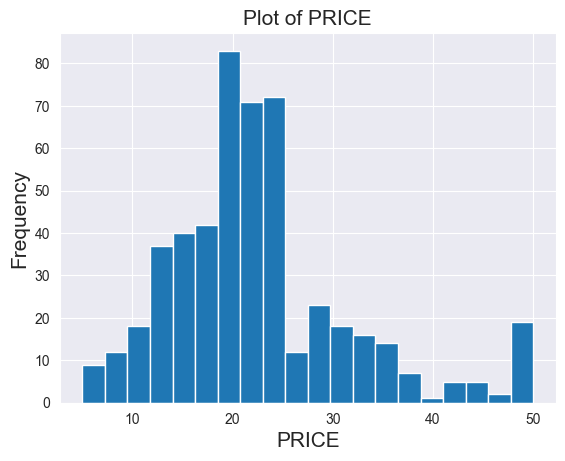

In [8]:
# ## Plot the histograms of all the variables (columns) in the new DataFrame.
# for c in subset_data.columns:
#     plt.figure(figsize=(20,10))
#     plt.title('Plot of '+c)
#     sns.histplot(subset_data[c])
#     plt.xticks(rotation=45)
#     plt.show()

for c in subset_data.columns:
    plt.title("Plot of "+c,fontsize=15)
    plt.grid(True)
    plt.xlabel(c,fontsize=15)
    plt.ylabel("Frequency",fontsize=15)
    plt.hist(subset_data[c],bins=20)
    plt.show()


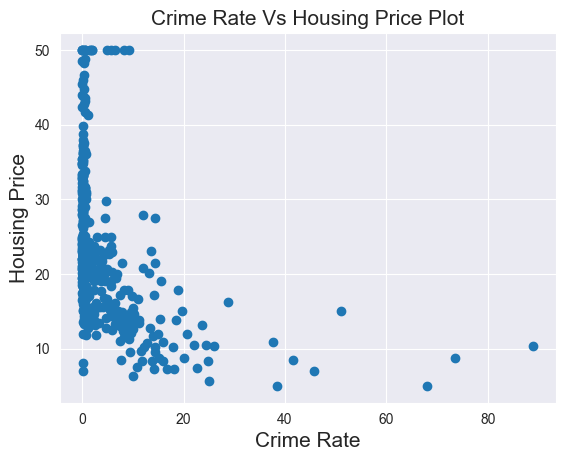

In [9]:
## Create a scatter plot of crime rate versus price
plt.scatter(x=subset_data['CRIM'], y=subset_data['PRICE'])
plt.title("Crime Rate Vs Housing Price Plot", fontsize=15)
plt.xlabel("Crime Rate", fontsize=15)
plt.ylabel("Housing Price", fontsize=15)
plt.grid(True)
plt.show()



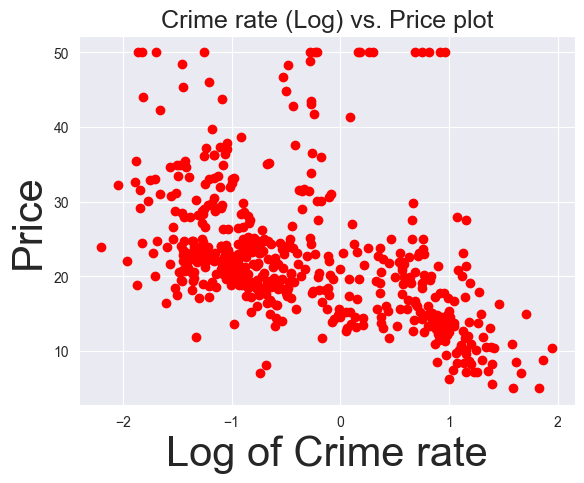

In [10]:
## Plot using log10(crime) versus price
plt.scatter(np.log10(subset_data['CRIM']),subset_data['PRICE'],c='red')
plt.title('Crime rate (Log) vs. Price plot', fontsize=18)
plt.xlabel('Log of Crime rate',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.show()



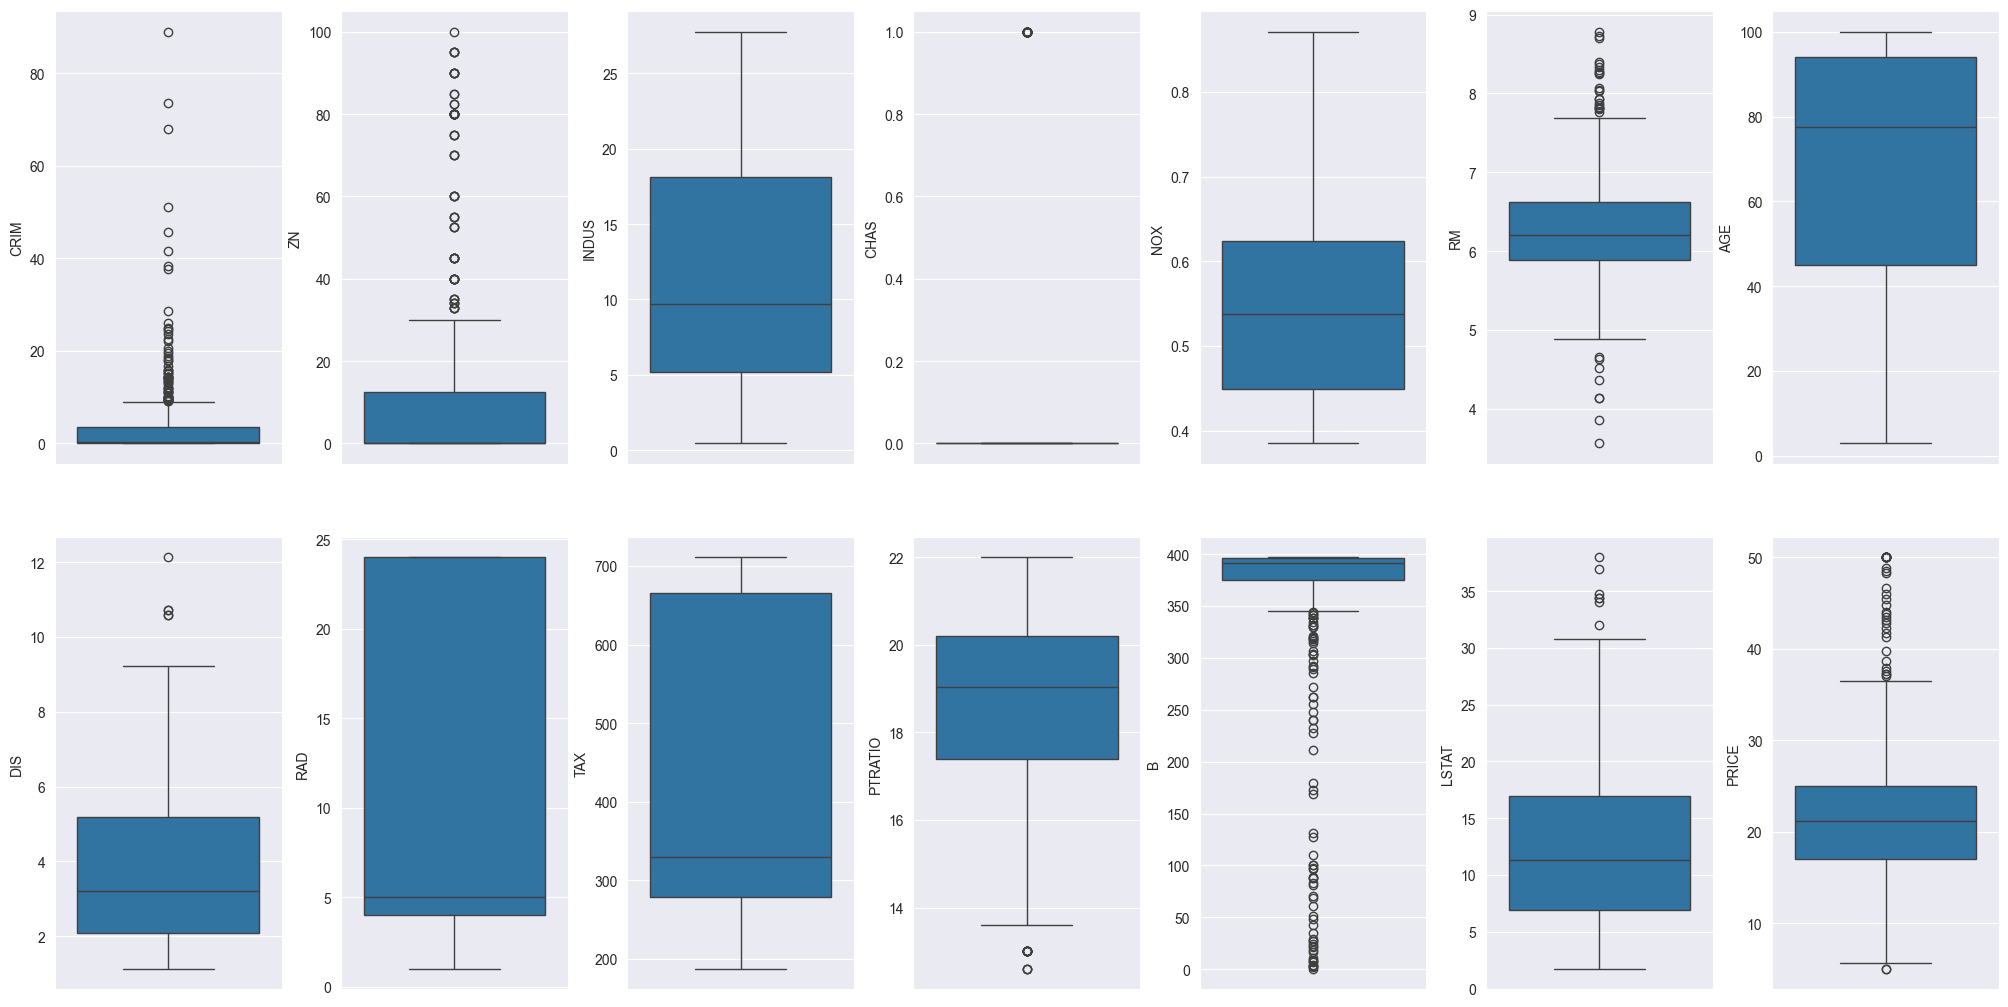

In [11]:
# create box plots
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston_data.items():
    sns.boxplot(y=k, data=boston_data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: >

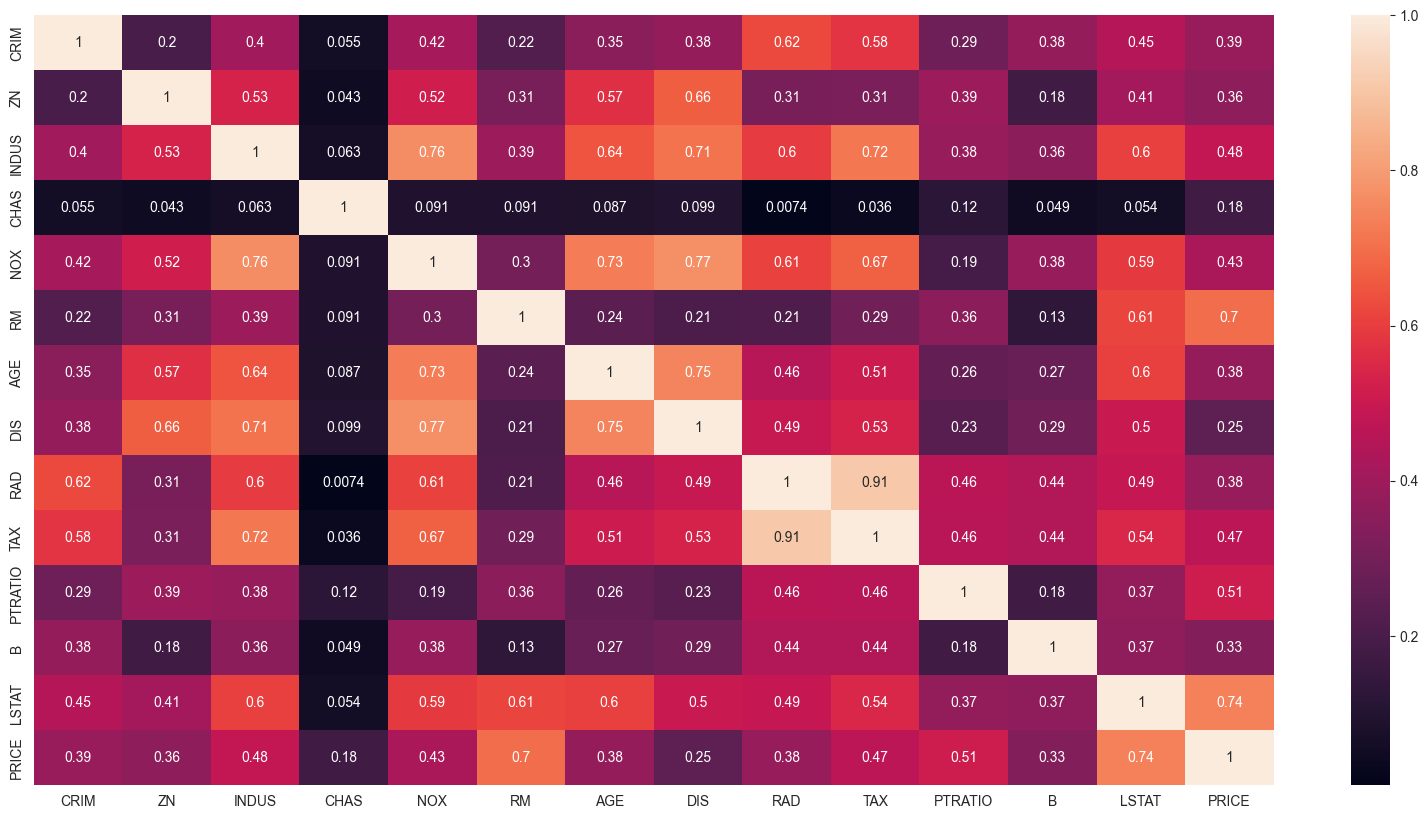

In [12]:
# Plotting Heatmap to identify variable behaviour at a threshold of correlation score= 0.5
plt.figure(figsize=(20, 10))
sns.heatmap(boston_data.corr().abs(),  annot=True)


## useful statistics - mean(), median()


In [13]:
### mean rooms per dwelling
subset_data['RM'].mean()


6.284634387351779

In [14]:
### median age
subset_data['AGE'].median()


77.5

In [15]:
### mean distances to five Boston employment centers
subset_data['DIS'].mean()


3.795042687747036

In [16]:
### percentage of houses with a low price
low_price=subset_data['PRICE']<20

low_price.mean()*100

41.50197628458498

# Data Wrangling with Python: Activity 4.01


In [17]:
# load the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [18]:
# Reading csv file
adult_obs = pd.read_csv('./datasets/adult_income_data.csv')
adult_obs.head()


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


In [19]:
# Create a script that will read a text file line by line
names = []
with open('./datasets/adult_income_names.txt','r') as f:
    for line in f:
        f.readline()
        var=line.split(':')[0]
        names.append(var)
        
names



['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [20]:
# Add a name of Income for the response variable to the dataset
names.append('Income')
names


['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Income']

In [21]:

adult_data = pd.read_csv('./datasets/adult_income_data.csv',names=names)

adult_data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [22]:
# Find the missing values
adult_data.isnull().sum()



age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [29]:
# Create a DataFrame with only age, education, and occupation by using subsetting
adult_subset_data = adult_data[['age', 'education', 'occupation']]

adult_subset_data.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


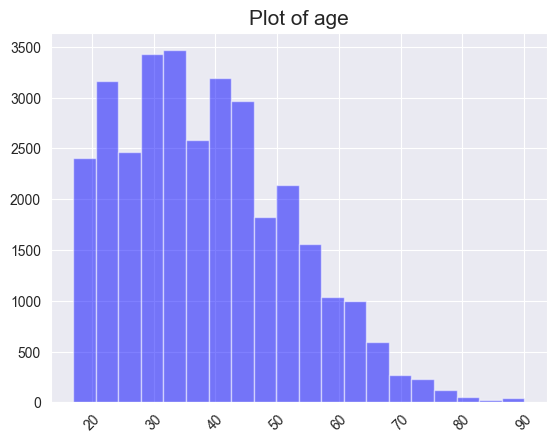

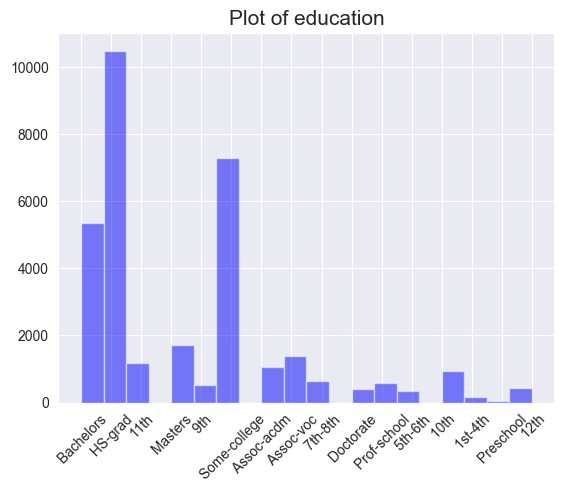

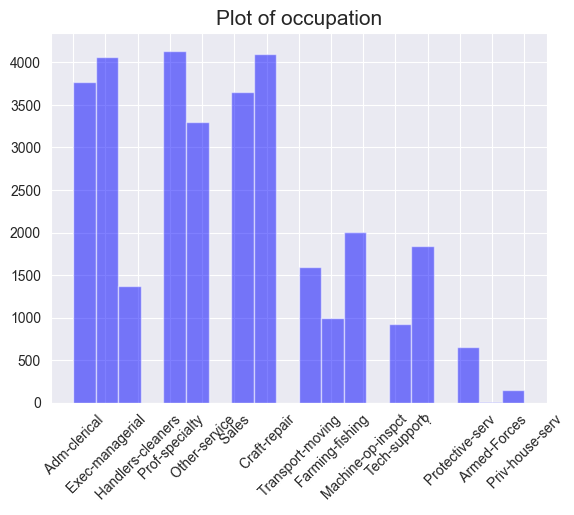

In [39]:

for c in adult_subset_data.columns:

    plt.title('Plot of '+c,fontsize=15)
    plt.hist(adult_subset_data[c],bins=20,facecolor='blue', alpha=0.5)
    plt.xticks(rotation = 45)
    plt.show()


In [25]:
# Create a function to strip the whitespace characters
def strip_whitespace(spaces):
    return spaces.strip()



In [26]:
# Education column
adult_subset_data['education_stripped']=adult_data['education'].apply(strip_whitespace)

adult_subset_data['education']=adult_subset_data['education_stripped']

adult_subset_data.drop(labels=['education_stripped'],axis=1,inplace=True)

# Occupation column

adult_subset_data['occupation_stripped']=adult_data['occupation'].apply(strip_whitespace)

adult_subset_data['occupation']=adult_subset_data['occupation_stripped']

adult_subset_data.drop(labels=['occupation_stripped'],axis=1,inplace=True)



C:\Users\gyanr\AppData\Local\Temp\ipykernel_28008\1111947196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_subset_data['education_stripped']=adult_data['education'].apply(strip_whitespace)
C:\Users\gyanr\AppData\Local\Temp\ipykernel_28008\1111947196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_subset_data['education']=adult_subset_data['education_stripped']
C:\Users\gyanr\AppData\Local\Temp\ipykernel_28008\1111947196.py:6: SettingWithCopyWarning: 
A value is trying to be set on a co

In [27]:
# Find the number of people who are aged between ['age']>=30 and ['age']<=50
filtered_data = adult_subset_data[(adult_subset_data['age']>=30) & (adult_subset_data['age']<=50)]
filtered_data.shape[0]


16390

In [48]:
# Group the records based on age and education
adult_subset_data.groupby('education')['age'].mean()


education
10th            37.429796
11th            32.355745
12th            32.000000
1st-4th         46.142857
5th-6th         42.885886
7th-8th         48.445820
9th             41.060311
Assoc-acdm      37.381443
Assoc-voc       38.553546
Bachelors       38.904949
Doctorate       47.702179
HS-grad         38.974479
Masters         44.049913
Preschool       42.764706
Prof-school     44.746528
Some-college    35.756275
Name: age, dtype: float64

In [50]:
# Group by occupation and show the summary statistics of age
occupation_grp_df = adult_subset_data.groupby('occupation').describe()['age']


In [51]:
# Profession has the oldest workers on average
occupation_grp_df[occupation_grp_df['mean'] == max(occupation_grp_df['mean'])]

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0


In [52]:
# which profession has its largest share of the workforce above the 75th percentile.
occupation_75_df = adult_subset_data[adult_subset_data['age'] > np.percentile(adult_subset_data['age'], 75)].groupby('occupation').describe()['age']
occupation_75_df

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,706.0,64.402266,8.209988,49.0,59.00,64.0,69.0,90.0
Adm-clerical,748.0,57.616310,7.382174,49.0,52.00,56.0,62.0,90.0
Craft-repair,919.0,55.694233,5.980823,49.0,51.00,54.0,59.0,90.0
Exec-managerial,1165.0,56.944206,7.470295,49.0,51.00,55.0,60.0,90.0
Farming-fishing,308.0,59.892857,7.839070,49.0,53.75,59.0,64.0,90.0
Handlers-cleaners,160.0,57.275000,7.502578,49.0,51.00,56.0,61.0,90.0
Machine-op-inspct,394.0,55.987310,6.479747,49.0,51.00,54.5,59.0,90.0
Other-service,631.0,58.591125,7.751755,49.0,53.00,57.0,62.5,90.0
Priv-house-serv,53.0,63.245283,8.790085,49.0,55.00,62.0,71.0,81.0


In [45]:
# Use subset and groupby to find outliers
outlier_stats= adult_subset_data.groupby('occupation').describe()['age']
outlier_stats


,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


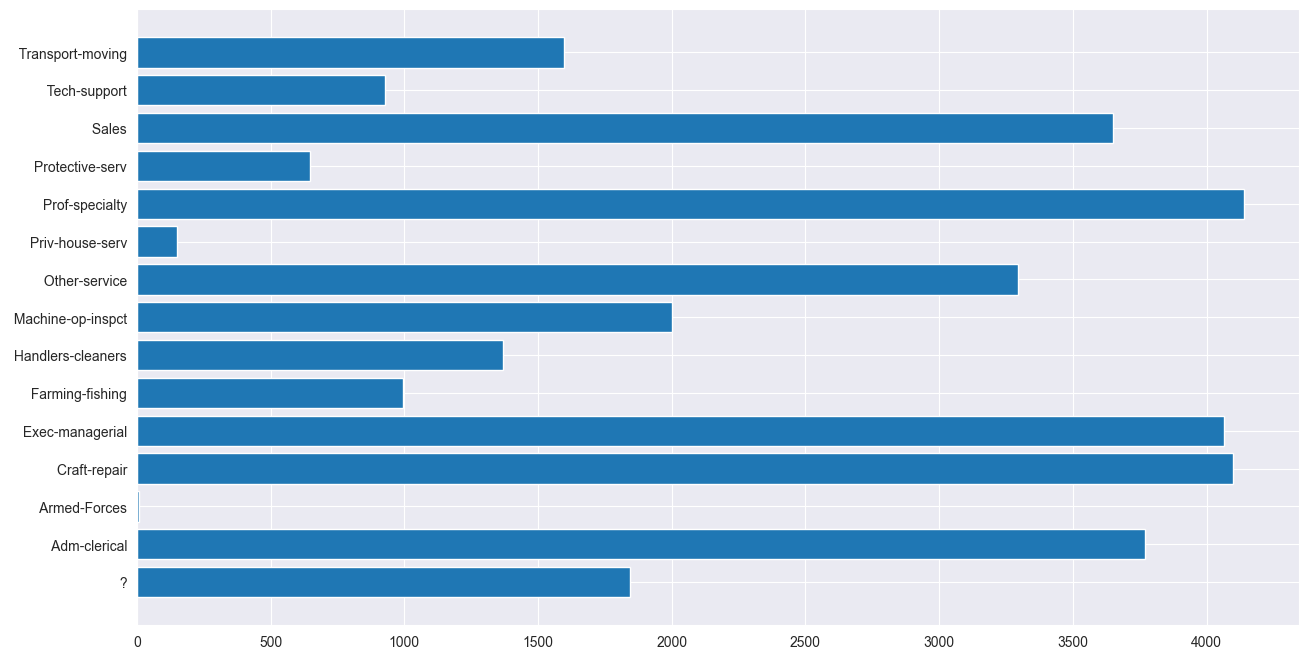

In [46]:
# Plot the values on a bar chart
plt.figure(figsize=(15,8))
plt.barh(y=outlier_stats.index, width=outlier_stats['count'])
plt.show()


In [58]:
# 15. Merge the data using common keys.

income_subset_df1 = adult_data[['age','workclass','occupation']].sample(5,random_state=101)
income_subset_df1.head()

,age,workclass,occupation
22357,51,Private,Machine-op-inspct
26009,19,Private,Sales
20734,40,Private,Exec-managerial
17695,17,Private,Handlers-cleaners
27908,61,Private,Craft-repair


In [60]:
income_subset_df2 = adult_data[['education','Income','occupation']].sample(5,random_state=101)
income_subset_df2.head()

,education,Income,occupation
22357,HS-grad,<=50K,Machine-op-inspct
26009,11th,<=50K,Sales
20734,HS-grad,<=50K,Exec-managerial
17695,10th,<=50K,Handlers-cleaners
27908,7th-8th,>50K,Craft-repair


In [61]:
df_merged = pd.merge(income_subset_df1,income_subset_df2,on='occupation',how='inner').drop_duplicates()
df_merged

,age,workclass,occupation,education,Income
0,51,Private,Machine-op-inspct,HS-grad,<=50K
1,19,Private,Sales,11th,<=50K
2,40,Private,Exec-managerial,HS-grad,<=50K
3,17,Private,Handlers-cleaners,10th,<=50K
4,61,Private,Craft-repair,7th-8th,>50K


In [ ]:
# Question 3.a
import pandas as pd
series1 = {'a':7.3, 'b':-2.5, 'c':3.4, 'd':1.5}
series1 = pd.Series(data=series1, index=['a', 'b', 'c', 'd'])
series1

In [ ]:
# Question 3.b
series2 = {'a':-2.1, 'c':3.6, 'e':-1.5, 'f':4, 'g':3.1}
series2 = pd.Series(data=series2, index=['a', 'c', 'e', 'f', 'g'])
series2

In [ ]:
## Question 3.c adding two series
total = series1 + series2
print(total)

In [ ]:
## Question 3.d subtracting two series
diff = series2 - series1
print(diff)